In [129]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [10]:
data=pd.read_csv('C:\\Users\\adarsh\\seeds.csv')

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199 entries, 0 to 198
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             199 non-null    float64
 1   Perimeter        199 non-null    float64
 2   Compactness      199 non-null    float64
 3   Kernel.Length    199 non-null    float64
 4   Kernel.Width     199 non-null    float64
 5   Asymmetry.Coeff  199 non-null    float64
 6   Kernel.Groove    199 non-null    float64
 7   Type             199 non-null    int64  
dtypes: float64(7), int64(1)
memory usage: 12.6 KB


In [15]:
data.head(10)

,Area,Perimeter,Compactness,Kernel.Length,Kernel.Width,Asymmetry.Coeff,Kernel.Groove,Type
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1
5,14.38,14.21,0.8951,5.386,3.312,2.462,4.956,1
6,14.69,14.49,0.8799,5.563,3.259,3.586,5.219,1
7,16.63,15.46,0.8747,6.053,3.465,2.040,5.877,1
8,16.44,15.25,0.8880,5.884,3.505,1.969,5.533,1
9,15.26,14.85,0.8696,5.714,3.242,4.543,5.314,1


In [16]:
#we need to predict to which class this seed  it beglong

# counting unique values

In [21]:
data['Type'].unique()

array([1, 2, 3], dtype=int64)

In [23]:
data['Type'].value_counts()

2    68
1    66
3    65
Name: Type, dtype: int64

In [24]:
data.dropna()

,Area,Perimeter,Compactness,Kernel.Length,Kernel.Width,Asymmetry.Coeff,Kernel.Groove,Type
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1
...,...,...,...,...,...,...,...,...
194,12.19,13.20,0.8783,5.137,2.981,3.631,4.870,3
195,11.23,12.88,0.8511,5.140,2.795,4.325,5.003,3
196,13.20,13.66,0.8883,5.236,3.232,8.315,5.056,3
197,11.84,13.21,0.8521,5.175,2.836,3.598,5.044,3


In [25]:
data['Type'].value_counts()

2    68
1    66
3    65
Name: Type, dtype: int64

In [26]:
x=data.drop(data.columns[[7]],axis=1)
y=data['Type']

In [27]:
x

,Area,Perimeter,Compactness,Kernel.Length,Kernel.Width,Asymmetry.Coeff,Kernel.Groove
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175
...,...,...,...,...,...,...,...
194,12.19,13.20,0.8783,5.137,2.981,3.631,4.870
195,11.23,12.88,0.8511,5.140,2.795,4.325,5.003
196,13.20,13.66,0.8883,5.236,3.232,8.315,5.056
197,11.84,13.21,0.8521,5.175,2.836,3.598,5.044


In [28]:
y

0      1
1      1
2      1
3      1
4      1
      ..
194    3
195    3
196    3
197    3
198    3
Name: Type, Length: 199, dtype: int64

In [65]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x,y, test_size=0.2, random_state=0)

In [121]:
from sklearn.linear_model import LinearRegression
lm=LinearRegression()

lm.fit(x_train, y_train)
lm

LinearRegression()

In [122]:
y_pred=lm.predict(x_test)

In [125]:
y_test

18     1
169    3
106    2
92     2
176    3
183    3
5      1
139    3
12     1
160    3
61     1
124    2
164    3
145    3
80     2
7      1
33     1
129    2
37     1
74     2
159    3
144    3
45     1
158    3
60     1
122    2
178    3
184    3
97     2
44     1
16     1
55     1
83     2
110    2
22     1
188    3
135    3
4      1
137    3
193    3
Name: Type, dtype: int64

In [126]:
y_pred_int = [int(i) for i in y_pred]

In [127]:
y_pred_int

[1,
 2,
 1,
 2,
 2,
 2,
 1,
 3,
 0,
 2,
 1,
 2,
 3,
 3,
 1,
 1,
 1,
 2,
 1,
 2,
 2,
 3,
 1,
 3,
 1,
 1,
 3,
 3,
 1,
 0,
 0,
 1,
 2,
 1,
 2,
 1,
 2,
 0,
 2,
 2]

In [128]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred_int,y_test)

0.525

# Feature scaling

In [92]:
from sklearn.preprocessing import StandardScaler
sc_x=StandardScaler()
x_train=sc_x.fit_transform(x_train)
x_test=sc_x.transform(x_test)

In [93]:
x_train

array([[-1.21393147, -1.09444853, -1.93335918, ..., -1.54773867,
         1.23265789, -0.25109946],
       [ 0.88142512,  1.00820357, -0.1619262 , ...,  0.74371469,
         0.29133364,  1.25451248],
       [-0.78735236, -0.75162482, -0.63286814, ..., -0.85712743,
        -0.83653351, -1.13639928],
       ...,
       [ 0.38318072,  0.55110529, -0.5291745 , ...,  0.2833072 ,
         0.44200292,  0.5378412 ],
       [-0.06387419,  0.01020565, -0.1489645 , ..., -0.05802938,
        -1.10558579, -0.16879267],
       [-0.88290608, -0.94970074, -0.01934745, ..., -0.69572021,
         0.94495132, -0.57831912]])

In [94]:
x_test

array([[-7.94177621e-01, -8.27807865e-01, -1.05758815e-01,
        -9.89150992e-01, -6.11047571e-01,  3.09987936e-01,
        -1.04606256e+00],
       [-1.21734410e+00, -1.22395971e+00, -1.02603985e+00,
        -1.09310011e+00, -1.38103940e+00,  1.58278459e+00,
        -8.69404095e-01],
       [ 1.47863588e+00,  1.57195812e+00,  2.38582321e-02,
         1.44461411e+00,  1.35229930e+00,  5.77949116e-03,
         1.06380164e+00],
       [ 1.45474745e+00,  1.47292016e+00,  4.51594487e-01,
         1.53048511e+00,  1.40257368e+00, -1.38432531e-01,
         1.61184439e+00],
       [-1.19004304e+00, -1.02588379e+00, -2.21419611e+00,
        -6.79563417e-01, -1.57949091e+00,  2.81289026e-01,
        -5.08057229e-01],
       [-1.08425142e+00, -1.24681462e+00,  3.65183122e-01,
        -1.20156874e+00, -8.65065495e-01, -5.23358014e-02,
        -6.08431359e-01],
       [-2.27680563e-01, -3.40236363e-01,  1.03919177e+00,
        -6.27588861e-01,  8.48556993e-02, -8.66667370e-01,
        -9.6174829

# training model

In [95]:
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression()
classifier.fit(x_train,y_train)


LogisticRegression()

In [96]:
y_pred=classifier.predict(x_test)

In [97]:
y_pred

array([3, 3, 2, 2, 3, 3, 1, 3, 1, 3, 1, 2, 3, 3, 2, 2, 1, 2, 3, 2, 3, 3,
       1, 3, 3, 2, 3, 3, 2, 1, 1, 1, 2, 2, 1, 3, 3, 1, 3, 3], dtype=int64)

In [98]:
from sklearn.metrics import confusion_matrix

In [99]:
cm=confusion_matrix(y_pred,y_test)

In [100]:
cm

array([[10,  0,  0],
       [ 1, 10,  0],
       [ 3,  0, 16]], dtype=int64)

In [101]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred,y_test)

0.9

In [102]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x,y, test_size=0.20, random_state=0)

In [103]:
from sklearn.preprocessing import StandardScaler
sc_x=StandardScaler()
x_train=sc_x.fit_transform(x_train)
x_test=sc_x.transform(x_test)

In [104]:
from sklearn.neighbors import KNeighborsClassifier

In [105]:
knn_classifier= KNeighborsClassifier(n_neighbors=3,p=2)
knn_classifier.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [106]:
y_pred=knn_classifier.predict(x_test)

In [107]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_pred,y_test)

In [108]:
cm

array([[11,  0,  1],
       [ 0, 10,  0],
       [ 3,  0, 15]], dtype=int64)

In [109]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred,y_test)

0.9

In [110]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [111]:
# Fitting Naive Bayes Classification to the Training set with linear kernel
from sklearn.naive_bayes import GaussianNB
nvclassifier = GaussianNB()
nvclassifier.fit(x_train, y_train)

GaussianNB()

In [112]:
y_pred = nvclassifier.predict(x_test)

In [113]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [114]:
cm

array([[11,  1,  2],
       [ 0, 10,  0],
       [ 1,  0, 15]], dtype=int64)

In [115]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred,y_test)

0.9

In [149]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier(random_state=0,criterion="entropy")
dt.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [150]:
y_pred = dt.predict(x_test)

In [151]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [152]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred,y_test)

0.875

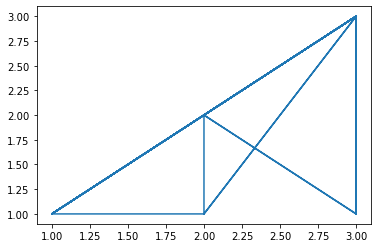

In [153]:
plt.plot(y_pred, y_test)

In [154]:
y_test.shape

(40,)

In [165]:
data.head()

,Area,Perimeter,Compactness,Kernel.Length,Kernel.Width,Asymmetry.Coeff,Kernel.Groove,Type
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


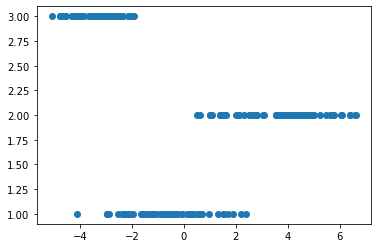

In [168]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
data = pd.read_csv('C:\\Users\\adarsh\\seeds.csv')

x = data.iloc[:, :-1]
y = data.iloc[:, -1]
pca = PCA(n_components=1)
x = pca.fit_transform(x)
plt.scatter(x,y)
plt.show()